# Bộ dữ liệu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/loan_data.csv")

In [ ]:
data.head()

,Luong,ThoiGianLamViec,ChoVay
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


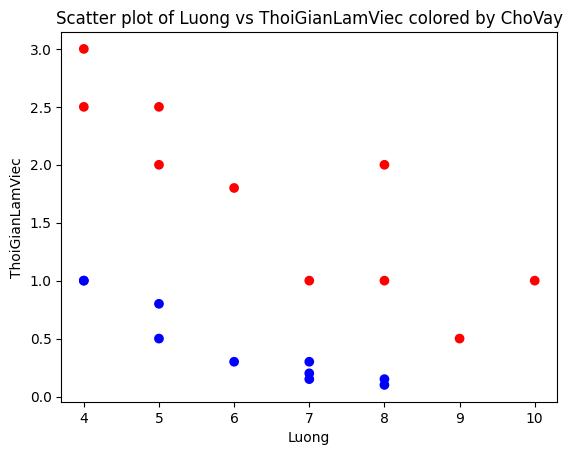

In [ ]:
plt.scatter(data["Luong"], data["ThoiGianLamViec"], c=data["ChoVay"], cmap='bwr')
plt.xlabel("Luong")
plt.ylabel("ThoiGianLamViec")
plt.title("Scatter plot of Luong vs ThoiGianLamViec colored by ChoVay")
plt.show()

# Code thuật toán Logistic Regression sử dụng Gradient Descent

Ở đây ta sẽ xây dựng một Class có tên là GradientLogisticRegression sử dụng chung cho cả 3 loại gradient là Normal Gradient Descent, Stochastic Gradient Descent và Accelerated Gradient Descent.
- Class: GradientLogisticRegression
- Attribute:
  + lr (learning_rate) = 2e-4 (mặc định nếu không điền thì là 2e-4)
  + max_iter = 20000, là số lần lặp tối đa
  + threshold = 0.5 , là ngưỡng mặc định ban đầu.
  + count_iter: Là số lần lặp khi hội tụ sớm
  + w: Là bộ trọng số cần cập nhật qua mỗi lần lặp
- Method:
  + fit(): Method này duyệt qua từng loại gradient để cập nhật trọng số và giá trị trả về là self (trả về chính class đó mà có các attribute đã được cập nhật.)
  + predict_proba(): Method này đơn giản là trả về giá trị xác xuất của dự đoán
  + predict(): Method trả về giá trị 1 hoặc 0 tùy theo ngưỡng threshold

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class GradientLogisticRegression:
    def __init__(self, threshold=0.8, lr=0.02, max_iter=1_000_000, tol=1e-2):
        self.threshold = threshold
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        self.count_iter = 0
        self.w = None

    def fit(self, X, y, init_point=None):
        if init_point is not None:
            self.w = init_point
        else:
            self.w = np.zeros(X.shape[1])

        for i in range(self.max_iter):
            z = X @ self.w
            y_pred = sigmoid(z)
            grad = X.T @ (y_pred - y)

            if np.linalg.norm(grad) < self.tol:
                print(f"Converged after {i} iterations.")
                self.count_iter = i
                break

            self.w -= self.lr * grad
        else:
            print("Không hội tụ sau số vòng lặp tối đa.")

    def predict_proba(self, X):
        return sigmoid(X @ self.w)

    def predict(self, X):
        return (self.predict_proba(X) >= self.threshold).astype(int)

In [ ]:
# Load data
data = pd.read_csv("/content/loan_data.csv")
# data = data.drop(index=5).reset_index(drop=True)

# Feature matrix and target
X_raw = data[["Luong", "ThoiGianLamViec"]].values
y = data["ChoVay"].values

# Thêm cột 1 để bias nằm trong w luôn
X = np.hstack([X_raw, np.ones((X_raw.shape[0], 1))])

In [ ]:
# Huấn luyện mô hình
model = GradientLogisticRegression(threshold=0.8)
model.fit(X, y, init_point=np.array([0.0, 0.0, 0.0]))  # hoặc khởi tạo khác

# Dự đoán
y_pred = model.predict(X)

Converged after 36927 iterations.


In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Dự đoán xem một người lương 9 triệu và làm việc 0.5 năm có được cho vay hay không
new_data = np.array([[9, 0.5, 1]])
prob = model.predict_proba(new_data)
print(f"Xác suất dự đoán cho vay: {prob[0]}")
new_pred = model.predict(new_data)
print(f"Dự đoán cho vay: {new_pred[0]}")

Xác suất dự đoán cho vay: 0.979164422263882
Dự đoán cho vay: 1


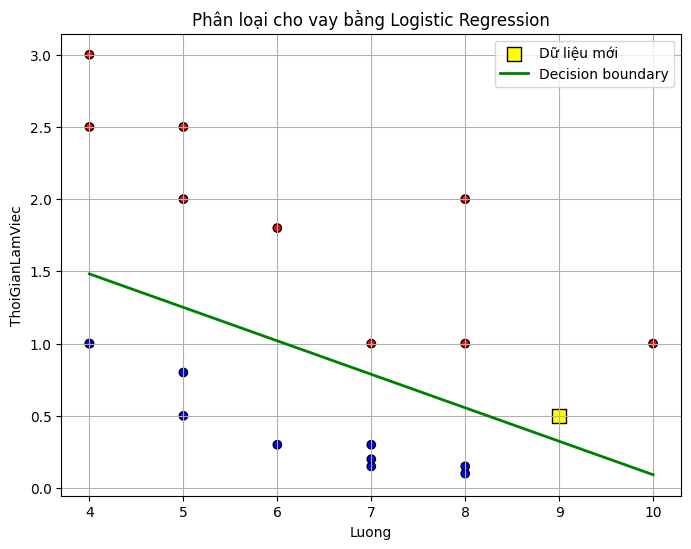

In [ ]:
# Vẽ đường ranh giới phân chia

# Tính toán ranh giới phân chia
rhs = -np.log(1 / model.threshold - 1)
x_vals = np.linspace(data["Luong"].min(), data["Luong"].max(), 100)
# Tính y theo công thức: sigmoid(w0*x + w1*y + w2) = threshold
# => y = (rhs - w0*x - w2) / w1
w = model.w
y_vals = (rhs - w[0] * x_vals - w[2]) / w[1]

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))

# Màu thủ công theo nhãn
colors = ['blue' if label == 0 else 'red' for label in y]
plt.scatter(data["Luong"], data["ThoiGianLamViec"], c=colors, edgecolors='k')

# Vẽ điểm dữ liệu mới với hình vuông màu vàng
plt.scatter(new_data[0, 0], new_data[0, 1], c='yellow', marker='s', s=100, edgecolors='k', label='Dữ liệu mới')

# Đường phân chia
plt.plot(x_vals, y_vals, color='green', linestyle='-', linewidth=2, label='Decision boundary')

plt.xlabel("Luong")
plt.ylabel("ThoiGianLamViec")
plt.title("Phân loại cho vay bằng Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


# Code thuật toán Logistic Regression sử dụng Accelerate Gradient Descent

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class AccelerateLogisticRegression:
    def __init__(self, threshold=0.8, lr=0.02, max_iter=1_000_000, tol=1e-2):
        self.threshold = threshold
        self.lr = lr  # eta trong thuật toán
        self.max_iter = max_iter
        self.tol = tol
        self.count_iter = 0
        self.w = None

    def fit(self, X, y, init_point=None):
        if init_point is not None:
            self.w = init_point
        else:
            self.w = np.zeros(X.shape[1])

        # Khởi tạo
        previous_w = self.w.copy()
        i = 0

        while i < self.max_iter:
            # Tính temp
            lr_factor = (i - 1) / (i + 2) if i > 0 else 0
            temp_w = self.w + lr_factor * (self.w - previous_w)

            # Tính gradient tại temp
            z_temp = X @ temp_w
            y_pred = sigmoid(z_temp)
            grad = X.T @ (y_pred - y)

            # Cập nhật next_point
            next_w = temp_w - self.lr * grad

            # Kiểm tra điều kiện dừng
            if np.linalg.norm(grad) < self.tol:
                print(f"Converged after {i} iterations.")
                self.count_iter = i
                self.w = next_w
                break

            # Cập nhật cho vòng lặp tiếp theo
            previous_w = self.w.copy()
            self.w = next_w
            i += 1
        else:
            print("Không hội tụ sau số vòng lặp tối đa.")
            self.w = next_w

    def predict_proba(self, X):
        return sigmoid(X @ self.w)

    def predict(self, X):
        return (self.predict_proba(X) >= self.threshold).astype(int)

In [ ]:
# Huấn luyện mô hình
model_accelerate = AccelerateLogisticRegression(threshold=0.8)
model_accelerate.fit(X, y, init_point=np.array([0.0, 0.0, 0.0]))  # hoặc khởi tạo khác

# Dự đoán
y_pred = model_accelerate.predict(X)

Converged after 396 iterations.


In [ ]:
y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Dự đoán xem một người lương 9 triệu và làm việc 0.5 năm có được cho vay hay không
new_data = np.array([[9, 0.5, 1]])
prob = model_accelerate.predict_proba(new_data)
print(f"Xác suất dự đoán cho vay: {prob[0]}")
new_pred = model_accelerate.predict(new_data)
print(f"Dự đoán cho vay: {new_pred[0]}")

Xác suất dự đoán cho vay: 0.979238937465723
Dự đoán cho vay: 1


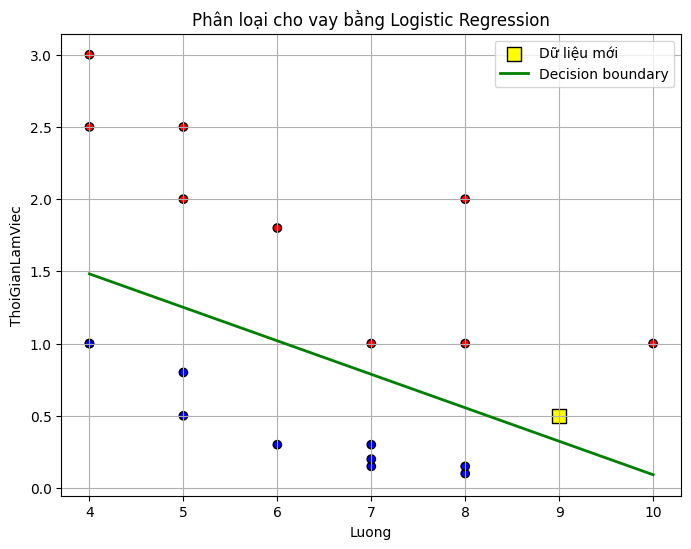

In [ ]:
# Vẽ đường ranh giới phân chia

# Tính toán ranh giới phân chia
rhs = -np.log(1 / model_accelerate.threshold - 1)
x_vals = np.linspace(data["Luong"].min(), data["Luong"].max(), 100)
# Tính y theo công thức: sigmoid(w0*x + w1*y + w2) = threshold
# => y = (rhs - w0*x - w2) / w1
w = model_accelerate.w
y_vals = (rhs - w[0] * x_vals - w[2]) / w[1]

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))

# Màu thủ công theo nhãn
colors = ['blue' if label == 0 else 'red' for label in y]
plt.scatter(data["Luong"], data["ThoiGianLamViec"], c=colors, edgecolors='k')

# Vẽ điểm dữ liệu mới với hình vuông màu vàng
plt.scatter(new_data[0, 0], new_data[0, 1], c='yellow', marker='s', s=100, edgecolors='k', label='Dữ liệu mới')

# Đường phân chia
plt.plot(x_vals, y_vals, color='green', linestyle='-', linewidth=2, label='Decision boundary')

plt.xlabel("Luong")
plt.ylabel("ThoiGianLamViec")
plt.title("Phân loại cho vay bằng Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()
